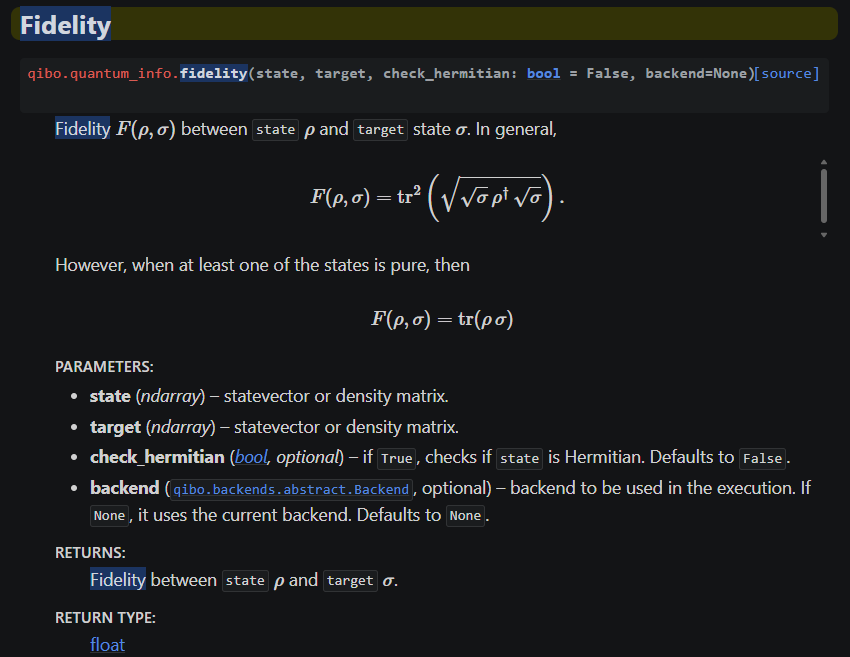

Fidelity code check:

In [10]:
import numpy as np
from qibo.backends import NumpyBackend

def purity(state):
    backend = NumpyBackend()
    if len(state.shape) == 1:
        pur = backend.np.real(backend.calculate_vector_norm(state)) ** 2
    else:
        pur = backend.np.real(backend.np.trace(backend.np.matmul(state, state))) # tr(rho^2)
    return float(pur)

In [ ]:
from qibo.backends import NumpyBackend

def fidelity1(state, target):
    backend = NumpyBackend()
    purity_state = purity(state) # purity of the density matrix 1 calculated using the backend. 
    purity_target = purity(target) # purity of the density matrix 2 calculated using the backend.

    # General formula for fidelity:

    # The eigenvalues and eigenvectors are used to reconstruct the square root of the density matrix 'state'.
    eigenvalues, eigenvectors = backend.calculate_eigenvectors(state)
    # Initialization of an empty state matrix to store the square root of it:
    state = np.zeros(state.shape, dtype=complex)
    #state = backend.cast(state, dtype=state.dtype)
    # Loop over the eigenvalues and eigenvectors to calculate the square root of the state matrix:
    # For each pair of eigenvalue and eigenvector, we calculate the outer product of the eigenvector
    # with itself.
    for eig, eigvec in zip(eigenvalues, backend.np.transpose(eigenvectors, (1, 0))):
        # Calculation of the square root of the state matrix using the spectral decomposition 
        # (since it is hermitian).
        matrix = backend.np.sqrt(eig) * backend.np.outer(eigvec, backend.np.conj(eigvec))
        #matrix = backend.cast(matrix, dtype=matrix.dtype)
        state = state + matrix # Summation of the spectral decomposition to obtain the square root of the state matrix.
        del matrix
    # Intermediate fidelity calculation: 
    fid = state @ target @ state # fid = state @ target @ state = sqrt(state) @ target @ sqrt(state)

    # We can REPEAT THE PROCESS again, now for fid, since fid is also hermitian:
    eigenvalues, eigenvectors = backend.calculate_eigenvectors(fid)
    # Initialization of an empty state matrix to store the square root of it:
    fid = np.zeros(state.shape, dtype=complex)
    fid = backend.cast(fid, dtype=fid.dtype)
    for eig, eigvec in zip(eigenvalues, backend.np.transpose(eigenvectors, (1, 0))):
        if backend.np.real(eig) > 1e-8: # Check if the eigenvalue is greater than 1e-8. WHY WE NEED THIS?
            matrix = backend.np.sqrt(eig) * backend.np.outer(eigvec, backend.np.conj(eigvec))
            #matrix = backend.cast(matrix, dtype=matrix.dtype)
            fid = fid + matrix
            del matrix
    # Final fidelity calculation:
    fid = backend.np.real(backend.np.trace(fid)) # Trace the resulting matrix

    return fid # tr(sqrt(fid)) [Nielsen and Chuang], but not the formula in the doc.


    return fid

In [13]:
from qibo.quantum_info import random_density_matrix
fidelity1(random_density_matrix(4), random_density_matrix(4))

[Qibo 0.2.16|INFO|2025-04-23 16:49:11]: Using numpy backend on /CPU:0


0.7814905298905408